1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

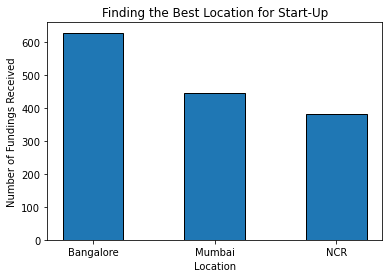

Bangalore 629
Mumbai 446
NCR 382


In [2]:
# SOLUTION 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

def city_name(s):
    s = str(s)
    list = s.strip().split('/')
    if 'New Delhi' in list:
        return 'New Delhi'
    elif 'Bangalore' in list:
        return 'Bangalore'
    elif 'Mumbai' in list:
        return 'Mumbai'
    
x = pd.read_csv('C:/Users/Saachi/Desktop/CN/clusterfuck/startup_funding.csv')
df = x.copy()
df['CityLocation' == 'Delhi']  = 'New Delhi'
df['CityLocation' == 'bangalore']  = 'Bangalore'
df['CityLocation'] = df['CityLocation'].apply(city_name)

b = df[df.CityLocation == 'Bangalore']
m = df[df.CityLocation == 'Mumbai']
nd = df[df.CityLocation == 'New Delhi']
n = df[df.CityLocation == 'Noida']
g = df[df.CityLocation == 'Gurgaon']

ncr = len(nd)+len(n)+len(g)
mum = len(m)
ban = len(b)

places = ['Bangalore', 'Mumbai', 'NCR']
fundings = [ban, mum, ncr]

d = dict(zip(places, fundings)) 

plt.bar(places,fundings,width=0.5, edgecolor="black")
plt.title('Finding the Best Location for Start-Up')
plt.xlabel('Location')
plt.ylabel('Number of Fundings Received')
plt.show()

for i in d:
    print(i, d[i])

2. Even after trying for so many times, your friend’s startup could not find the investment. So, you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So, consider each investor for that startup. Ignore undisclosed investors.

In [4]:
# SOLUTION 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

with open('C:/Users/Saachi/Desktop/CN/clusterfuck/startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    inv=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                inv.append(i.strip())
    dic=dict()
    for i in inv:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x = []
    y = []
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x = np.array(x)
    np_y= np.array(y)
    np_x = np_x[np.argsort(np_y)]  #sorting np_x wrt no. of investments
    np_y = np.sort(np_y)
    
    np_x = np_x[len(np_x)-1:len(np_x)-1-6:-1]
    np_y = np_y[len(np_y)-1:len(np_y)-1-6:-1]
    
    for i in range(len(np_x)):
        if np_x[i] == '':
            continue
        print(np_x[i], np_y[i])
        
#Sequoia Capital 64
#Accel Partners 52
#Kalaari Capital 44
#SAIF Partners 41
#Indian Angel Network 40

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


3. After re-analysing the dataset, you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of start-ups. This list will be more helpful than your previous list in finding the investment for your friend start-up. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one start-up, count one for that company. There are many errors in start-up names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

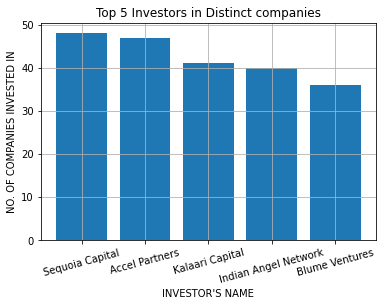

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [8]:
# SOLUTION 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("C:/Users/Saachi/Desktop/CN/clusterfuck/startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])

d1 = sorted(d, key = d.get, reverse = True)

investors = d1[0:5]
num_of_companies = []

top_10_investors = d1[0:5]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies)
plt.xlabel("INVESTOR'S NAME")
plt.ylabel("NO. OF COMPANIES INVESTED IN")
plt.title("Top 5 Investors in Distinct companies")
plt.xticks(rotation = 15)
plt.grid()

plt.show()

for i in investors:
    print(i,d[i])
    
#Sequoia Capital 48
#Accel Partners 47
#Kalaari Capital 41
#Indian Angel Network 40
#Blume Ventures 36

4.	Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend’s start-up is at an early stage start-up, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of start-ups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types is - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in start-up names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

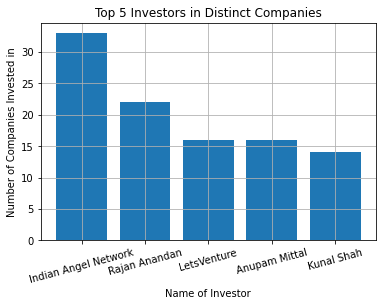

Indian Angel Network 33
Rajan Anandan 22
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("C:/Users/Saachi/Desktop/CN/clusterfuck/startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    if row["InvestmentType"] == "PrivateEquity":
        row["InvestmentType"] = "Private Equity"
    if row["InvestmentType"] == "SeedFunding":
        row["InvestmentType"] = "Seed Funding"
    if row["InvestmentType"] == "Crowd funding":
        row["InvestmentType"] = "Crowd Funding"
        
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if 'Seed Funding' in row['InvestmentType'] or 'Crowd Funding' in row['InvestmentType']:
                if i in d:
                    d[i].add(row["StartupName"])
                else:
                    d[i] = set()
                    d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])

dict = sorted(d, key = d.get, reverse = True)

investors = dict[0:5]
num_of_companies = []

top_10_investors = dict[0:10]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies)
plt.xlabel("Name of Investor")
plt.ylabel("Number of Companies Invested in")
plt.title("Top 5 Investors in Distinct Companies")
plt.xticks(rotation = 15)
plt.grid()

plt.show()

for i in investors:
    print(i,d[i])
    
#Indian Angel Network 33
#Rajan Anandan 23
#LetsVenture 16
#Anupam Mittal 16
#Kunal Shah 14

5.	Due to your immense help, your friend start-up successfully got seed funding and it is on the operational mode. Now your friend wants to expand his start-up and he is looking for new investors for his start-up. Now you again come as a saviour to help your friend and want to create a list of probable new investors. Before moving forward, you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend start-up is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of start-ups and their investment type is Private Equity. Correct spelling of investment types is: "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in start-up names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

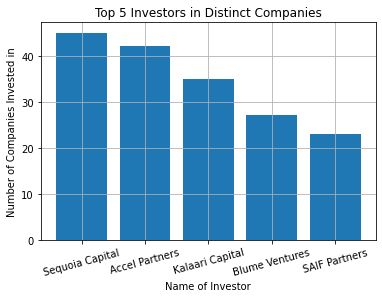

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 23


In [8]:
# SOLUTION 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("C:/Users/Saachi/Desktop/CN/clusterfuck/startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    if row["InvestmentType"] == "PrivateEquity":
        row["InvestmentType"] = "Private Equity"
    if row["InvestmentType"] == "SeedFunding":
        row["InvestmentType"] = "Seed Funding"
    if row["InvestmentType"] == "Crowd funding":
        row["InvestmentType"] = "Crowd Funding"
        
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if 'Private Equity' in row['InvestmentType']:
                if i in d:
                    d[i].add(row["StartupName"])
                else:
                    d[i] = set()
                    d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])

dict = sorted(d, key = d.get, reverse = True)

investors = dict[0:5]
num_of_companies = []

top_10_investors = dict[0:10]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies)
plt.xlabel("Name of Investor")
plt.ylabel("Number of Companies Invested in")
plt.title("Top 5 Investors in Distinct Companies")
plt.xticks(rotation = 15)
plt.grid()

plt.show()

for i in investors:
    print(i,d[i])
    
#Sequoia Capital 45
#Accel Partners 43
#Kalaari Capital 35
#Blume Ventures 27
#SAIF Partners 24